In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import TimeSeriesSplit,train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import BaggingRegressor

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [4]:
train_df = train.copy()
test_df = test.copy()

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
date_time              33750 non-null object
is_holiday             33750 non-null object
air_pollution_index    33750 non-null int64
humidity               33750 non-null int64
wind_speed             33750 non-null int64
wind_direction         33750 non-null int64
visibility_in_miles    33750 non-null int64
dew_point              33750 non-null int64
temperature            33750 non-null float64
rain_p_h               33750 non-null float64
snow_p_h               33750 non-null float64
clouds_all             33750 non-null int64
weather_type           33750 non-null object
weather_description    33750 non-null object
traffic_volume         33750 non-null int64
dtypes: float64(3), int64(8), object(4)
memory usage: 3.9+ MB


In [6]:
train_df.date_time.dtype

dtype('O')

In [7]:
train_df['date_time'] = pd.to_datetime(train_df['date_time'])

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14454 entries, 0 to 14453
Data columns (total 14 columns):
date_time              14454 non-null object
is_holiday             14454 non-null object
air_pollution_index    14454 non-null int64
humidity               14454 non-null int64
wind_speed             14454 non-null int64
wind_direction         14454 non-null int64
visibility_in_miles    14454 non-null int64
dew_point              14454 non-null int64
temperature            14454 non-null float64
rain_p_h               14454 non-null float64
snow_p_h               14454 non-null int64
clouds_all             14454 non-null int64
weather_type           14454 non-null object
weather_description    14454 non-null object
dtypes: float64(2), int64(8), object(4)
memory usage: 1.5+ MB


In [9]:
test_df['date_time'] = pd.to_datetime(test_df['date_time'])

Conclusions time split of data validation set to be made accordingly

In [10]:
train_df.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [11]:
def LabelEncode(dataf,datap):
    le = LabelEncoder()
    le.fit(dataf)
    v = le.transform(datap)
    return v

In [12]:
def findweekday(a):
    return a.weekday()

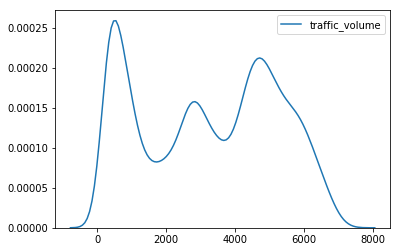

In [13]:
sns.kdeplot(train_df.traffic_volume)

# Train preprocessing

In [14]:
train_df['weather_type'] = LabelEncode(train_df['weather_type'].append([test_df['weather_type']]),train_df['weather_type'])
train_df['is_holiday'] = LabelEncode(train_df['is_holiday'].append([test_df['is_holiday']]),train_df['is_holiday'])
train_df['weather_description'] = LabelEncode(train_df['weather_description'].append([test_df['weather_description']]),train_df['weather_description'])
train_df['month'] = train_df['date_time'].dt.month
train_df['day'] = train_df['date_time'].apply(findweekday)
train_df['hour'] = train_df['date_time'].dt.hour
train_df['year'] = train_df['date_time'].dt.year

In [15]:
train_df.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,month,day,hour,year
0,2012-10-02 09:00:00,7,121,89,2,329,1,1,288.28,0.0,0.0,40,1,24,5545,10,1,9,2012
1,2012-10-02 10:00:00,7,178,67,3,330,1,1,289.36,0.0,0.0,75,1,2,4516,10,1,10,2012
2,2012-10-02 11:00:00,7,113,66,3,329,2,2,289.58,0.0,0.0,90,1,19,4767,10,1,11,2012
3,2012-10-02 12:00:00,7,20,66,3,329,5,5,290.13,0.0,0.0,90,1,19,5026,10,1,12,2012
4,2012-10-02 13:00:00,7,281,65,3,329,7,7,291.14,0.0,0.0,75,1,2,4918,10,1,13,2012


In [16]:
test_df['weather_type'] = LabelEncode(test_df['weather_type'].append([train['weather_type']]),test_df['weather_type'])
test_df['is_holiday'] = LabelEncode(test_df['is_holiday'].append([train['is_holiday']]),test_df['is_holiday'])
test_df['weather_description'] = LabelEncode(train['weather_description'].append([test_df['weather_description']]),test_df['weather_description'])
test_df['month'] = test_df['date_time'].dt.month
test_df['day'] = test_df['date_time'].apply(findweekday)
test_df['hour'] = test_df['date_time'].dt.hour
test_df['year'] = test_df['date_time'].dt.year

In [17]:
test_df.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,month,day,hour,year
0,2017-05-18 00:00:00,7,73,63,1,27,4,4,285.15,0.0,0,90,6,18,5,3,0,2017
1,2017-05-18 00:00:00,7,251,63,1,27,4,4,285.15,0.0,0,90,5,17,5,3,0,2017
2,2017-05-18 00:00:00,7,75,56,1,0,1,1,285.15,0.0,0,90,2,11,5,3,0,2017
3,2017-05-18 01:00:00,7,98,56,1,351,2,2,284.79,0.0,0,90,6,9,5,3,1,2017
4,2017-05-18 01:00:00,7,283,56,1,351,1,1,284.79,0.0,0,90,5,17,5,3,1,2017


In [18]:
new_train = train_df.drop(['date_time'],axis=1)

In [19]:
new_test = test_df.drop(['date_time'],axis=1)

In [20]:
#Time based split

In [21]:
tscv = TimeSeriesSplit(n_splits=2)

In [22]:
y = new_train.traffic_volume

In [23]:
x = new_train.drop(['traffic_volume'],axis=1)

In [24]:
x.year.value_counts()

2016    9306
2013    8573
2014    4839
2015    4373
2017    4100
2012    2559
Name: year, dtype: int64

In [25]:
new_test.year.value_counts()

2018    7949
2017    6505
Name: year, dtype: int64

In [26]:
x_train_new = new_train.loc[new_train.year!=2017]

In [27]:
x_test_new = new_train.loc[new_train.year==2017]

In [28]:
x_train_new.year.value_counts()

2016    9306
2013    8573
2014    4839
2015    4373
2012    2559
Name: year, dtype: int64

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,shuffle=False)

In [66]:
#applying staking to the problem
model1 = RandomForestRegressor()
model2 = XGBRegressor()
model3 = LGBMRegressor()
model4 = CatBoostRegressor()
model5 = BaggingRegressor()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
model4.fit(x_train,y_train)
model5.fit(x_train,y_train)

pred1 = model1.predict(x_test)
pred2 = model2.predict(x_test)
pred3 = model3.predict(x_test)
pred4 = model4.predict(x_test)
pred5 = model5.predict(x_test)

predt1 = model1.predict(new_test)
predt2 = model2.predict(new_test)
predt3 = model3.predict(new_test)
predt4 = model4.predict(new_test)
predt5 = model5.predict(new_test)

stacked_pred = np.column_stack((pred1,pred2,pred3,pred4,pred5))
stacked_test_pred = np.column_stack((predt1,predt2,predt3,predt4,predt5))

meta_model = RandomForestRegressor()
meta_model.fit(stacked_pred,y_test)
final_pred = meta_model.predict(stacked_test_pred)

c:\users\anubh\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0:	learn: 3722.0236588	total: 197ms	remaining: 3m 17s
1:	learn: 3619.2660734	total: 228ms	remaining: 1m 53s
2:	learn: 3520.3736195	total: 259ms	remaining: 1m 26s
3:	learn: 3421.9041040	total: 288ms	remaining: 1m 11s
4:	learn: 3325.9688149	total: 319ms	remaining: 1m 3s
5:	learn: 3231.1879835	total: 349ms	remaining: 57.7s
6:	learn: 3142.8940948	total: 378ms	remaining: 53.6s
7:	learn: 3059.2718103	total: 407ms	remaining: 50.5s
8:	learn: 2974.9532787	total: 445ms	remaining: 49s
9:	learn: 2892.5470523	total: 484ms	remaining: 47.9s
10:	learn: 2813.4584187	total: 528ms	remaining: 47.5s
11:	learn: 2737.6265783	total: 557ms	remaining: 45.8s
12:	learn: 2662.9226076	total: 586ms	remaining: 44.5s
13:	learn: 2591.2763061	total: 615ms	remaining: 43.3s
14:	learn: 2523.4989018	total: 645ms	remaining: 42.4s
15:	learn: 2456.3880896	total: 681ms	remaining: 41.9s
16:	learn: 2391.8582735	total: 712ms	remaining: 41.2s
17:	learn: 2329.5432924	total: 742ms	remaining: 40.5s
18:	learn: 2269.4496075	total: 771ms

155:	learn: 542.6780755	total: 5.41s	remaining: 29.2s
156:	learn: 541.7850261	total: 5.44s	remaining: 29.2s
157:	learn: 541.2603489	total: 5.46s	remaining: 29.1s
158:	learn: 540.6905121	total: 5.49s	remaining: 29.1s
159:	learn: 540.2001964	total: 5.52s	remaining: 29s
160:	learn: 539.4731494	total: 5.55s	remaining: 28.9s
161:	learn: 539.0483334	total: 5.58s	remaining: 28.9s
162:	learn: 538.6022741	total: 5.62s	remaining: 28.8s
163:	learn: 537.9644694	total: 5.65s	remaining: 28.8s
164:	learn: 537.2629471	total: 5.68s	remaining: 28.7s
165:	learn: 536.6361246	total: 5.71s	remaining: 28.7s
166:	learn: 536.0025849	total: 5.74s	remaining: 28.6s
167:	learn: 535.4607460	total: 5.78s	remaining: 28.6s
168:	learn: 535.1085089	total: 5.81s	remaining: 28.6s
169:	learn: 534.5398110	total: 5.84s	remaining: 28.5s
170:	learn: 533.8728938	total: 5.87s	remaining: 28.5s
171:	learn: 532.9636442	total: 5.9s	remaining: 28.4s
172:	learn: 532.5426866	total: 5.95s	remaining: 28.5s
173:	learn: 531.8937564	total: 

308:	learn: 493.8596136	total: 10.8s	remaining: 24.2s
309:	learn: 493.6937971	total: 10.9s	remaining: 24.2s
310:	learn: 493.5425186	total: 10.9s	remaining: 24.2s
311:	learn: 493.5069962	total: 10.9s	remaining: 24.1s
312:	learn: 493.2777021	total: 11s	remaining: 24.1s
313:	learn: 493.1622451	total: 11s	remaining: 24.1s
314:	learn: 493.0835954	total: 11.1s	remaining: 24.1s
315:	learn: 492.9199272	total: 11.1s	remaining: 24s
316:	learn: 492.7984663	total: 11.1s	remaining: 24s
317:	learn: 492.5250018	total: 11.2s	remaining: 23.9s
318:	learn: 492.3213010	total: 11.2s	remaining: 23.9s
319:	learn: 492.0474757	total: 11.2s	remaining: 23.8s
320:	learn: 491.9509917	total: 11.3s	remaining: 23.8s
321:	learn: 491.8664011	total: 11.3s	remaining: 23.8s
322:	learn: 491.7557027	total: 11.3s	remaining: 23.8s
323:	learn: 491.6687983	total: 11.4s	remaining: 23.8s
324:	learn: 491.4630076	total: 11.4s	remaining: 23.7s
325:	learn: 491.1614041	total: 11.5s	remaining: 23.7s
326:	learn: 490.8944115	total: 11.5s

467:	learn: 473.5218221	total: 15.9s	remaining: 18.1s
468:	learn: 473.4543298	total: 16s	remaining: 18.1s
469:	learn: 473.3163294	total: 16s	remaining: 18s
470:	learn: 473.1559550	total: 16s	remaining: 18s
471:	learn: 473.0604763	total: 16.1s	remaining: 18s
472:	learn: 473.0251442	total: 16.1s	remaining: 17.9s
473:	learn: 473.0122924	total: 16.1s	remaining: 17.9s
474:	learn: 472.9369731	total: 16.2s	remaining: 17.9s
475:	learn: 472.8852969	total: 16.2s	remaining: 17.8s
476:	learn: 472.8554978	total: 16.2s	remaining: 17.8s
477:	learn: 472.8184815	total: 16.2s	remaining: 17.7s
478:	learn: 472.7948766	total: 16.3s	remaining: 17.7s
479:	learn: 472.6706327	total: 16.3s	remaining: 17.7s
480:	learn: 472.6108336	total: 16.3s	remaining: 17.6s
481:	learn: 472.5277300	total: 16.4s	remaining: 17.6s
482:	learn: 472.3501477	total: 16.4s	remaining: 17.5s
483:	learn: 472.3216581	total: 16.4s	remaining: 17.5s
484:	learn: 472.2164583	total: 16.5s	remaining: 17.5s
485:	learn: 472.1451068	total: 16.5s	rem

621:	learn: 461.3580896	total: 20.7s	remaining: 12.6s
622:	learn: 461.2161154	total: 20.7s	remaining: 12.5s
623:	learn: 461.2078425	total: 20.7s	remaining: 12.5s
624:	learn: 461.0635936	total: 20.8s	remaining: 12.5s
625:	learn: 460.8885338	total: 20.8s	remaining: 12.4s
626:	learn: 460.7459047	total: 20.8s	remaining: 12.4s
627:	learn: 460.6728213	total: 20.9s	remaining: 12.4s
628:	learn: 460.5827989	total: 20.9s	remaining: 12.3s
629:	learn: 460.5308041	total: 20.9s	remaining: 12.3s
630:	learn: 460.5260888	total: 21s	remaining: 12.3s
631:	learn: 460.3942195	total: 21s	remaining: 12.2s
632:	learn: 460.2586615	total: 21s	remaining: 12.2s
633:	learn: 460.1888224	total: 21s	remaining: 12.1s
634:	learn: 460.1673099	total: 21.1s	remaining: 12.1s
635:	learn: 460.1423840	total: 21.1s	remaining: 12.1s
636:	learn: 459.9493448	total: 21.1s	remaining: 12s
637:	learn: 459.8377491	total: 21.2s	remaining: 12s
638:	learn: 459.8009203	total: 21.2s	remaining: 12s
639:	learn: 459.7266177	total: 21.2s	remai

776:	learn: 450.4203470	total: 25.5s	remaining: 7.33s
777:	learn: 450.2978284	total: 25.6s	remaining: 7.29s
778:	learn: 450.2319049	total: 25.6s	remaining: 7.26s
779:	learn: 450.1997147	total: 25.6s	remaining: 7.23s
780:	learn: 450.1295678	total: 25.6s	remaining: 7.19s
781:	learn: 450.0946857	total: 25.7s	remaining: 7.16s
782:	learn: 450.0820438	total: 25.7s	remaining: 7.12s
783:	learn: 450.0358350	total: 25.7s	remaining: 7.09s
784:	learn: 450.0239950	total: 25.8s	remaining: 7.06s
785:	learn: 449.9749082	total: 25.8s	remaining: 7.02s
786:	learn: 449.8831138	total: 25.8s	remaining: 6.99s
787:	learn: 449.8569024	total: 25.9s	remaining: 6.96s
788:	learn: 449.8540151	total: 25.9s	remaining: 6.93s
789:	learn: 449.6449259	total: 25.9s	remaining: 6.89s
790:	learn: 449.6422478	total: 26s	remaining: 6.86s
791:	learn: 449.5936560	total: 26s	remaining: 6.83s
792:	learn: 449.5721456	total: 26s	remaining: 6.79s
793:	learn: 449.5703729	total: 26.1s	remaining: 6.76s
794:	learn: 449.5309575	total: 26.

936:	learn: 443.1778516	total: 30.3s	remaining: 2.04s
937:	learn: 443.1566553	total: 30.3s	remaining: 2s
938:	learn: 443.1565198	total: 30.3s	remaining: 1.97s
939:	learn: 443.1558799	total: 30.4s	remaining: 1.94s
940:	learn: 443.1303776	total: 30.4s	remaining: 1.91s
941:	learn: 443.1300470	total: 30.4s	remaining: 1.87s
942:	learn: 443.1191718	total: 30.5s	remaining: 1.84s
943:	learn: 443.1140624	total: 30.5s	remaining: 1.81s
944:	learn: 442.9950151	total: 30.5s	remaining: 1.78s
945:	learn: 442.9398851	total: 30.5s	remaining: 1.74s
946:	learn: 442.9391998	total: 30.6s	remaining: 1.71s
947:	learn: 442.9025756	total: 30.6s	remaining: 1.68s
948:	learn: 442.9015809	total: 30.6s	remaining: 1.65s
949:	learn: 442.8770876	total: 30.7s	remaining: 1.61s
950:	learn: 442.7624895	total: 30.7s	remaining: 1.58s
951:	learn: 442.7619388	total: 30.7s	remaining: 1.55s
952:	learn: 442.7297080	total: 30.8s	remaining: 1.52s
953:	learn: 442.6547811	total: 30.8s	remaining: 1.48s
954:	learn: 442.6313024	total: 

c:\users\anubh\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [68]:
stacked_test_pred

array([[ 792.2       ,  779.3706665 ,  670.08186668,  707.41431916,
         787.8       ],
       [ 795.        ,  779.3706665 ,  670.08186668,  709.60167519,
         787.8       ],
       [ 808.6       ,  779.3706665 ,  668.9911933 ,  708.91864506,
         697.4       ],
       ...,
       [2408.9       , 2389.80908203, 2389.07924016, 2243.27004889,
        2469.5       ],
       [1867.5       , 1983.14990234, 1824.39015094, 1741.99471375,
        1613.1       ],
       [ 989.        , 1173.25524902, 1183.78238648, 1086.62883687,
        1352.5       ]])

In [71]:
y_test.values

array([4066, 4349, 4664, ..., 2194, 1328, 1328], dtype=int64)

In [69]:
final_pred

array([ 999.8,  667.4,  744.6, ..., 2066.1, 2042.8, 1367.2])

In [60]:
bagged_pred = np.zeros(new_test.shape[0])

In [61]:
seed = 310
bags = 4

In [62]:
for n in range(0,4):
    rf = RandomForestRegressor(n_estimators=280,n_jobs=-1,random_state=seed+n,max_features=9,min_samples_leaf=5,min_samples_split=20)
    rf.fit(x,y)
    preds = rf.predict(new_test)
    bagged_pred+=preds
bagged_pred/=bags

In [59]:
score(y_test,bagged_pred)

99.9536283177025

In [ ]:
rf.get_params()

In [ ]:
rf.feature_importances_

In [ ]:
rf.fit(x,y)

In [ ]:
y_pred2 = rf.predict(new_test)

In [72]:
kk = pd.DataFrame({'date_time':test['date_time'],'traffic_volume':final_pred})

In [73]:
kk.to_csv("sub7_stack.csv",index=False)

In [ ]:
cb = CatBoostRegressor()

In [ ]:
x_train.head()

In [ ]:
cat_features = [0,11,12,13,14,15,16]

In [ ]:
cb.fit(x_train,y_train,cat_features=cat_features,eval_set=(x_test,y_test),plot=True)

In [33]:
def score(y_actual,y_predicted):
    rms = sqrt(mean_squared_error(y_actual, y_predicted))
    rms = rms/10000
    return max(0,100-rms)

In [ ]:
y_pred = cb.predict(x_test)

In [ ]:
score(y_test,y_pred)

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(x_train,y_train)

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
score(y_test,y_pred)

In [ ]:
rf.fit(x,y)

In [ ]:
y_pred2 = rf.predict(new_test)

In [ ]:
kk = pd.DataFrame({'date_time':test['date_time'],'traffic_volume':y_pred2})

In [ ]:
kk.to_csv("sub1.csv",index=False)

In [ ]:
xg = XGBRegressor()

In [ ]:
xg.fit(x_train,y_train)

In [ ]:
v = xg.predict(x_test)

In [ ]:
score(y_test,v)

In [ ]:
xg.fit(x,y)

In [ ]:
y_pred2 = xg.predict(new_test)

In [ ]:
kk = pd.DataFrame({'date_time':test['date_time'],'traffic_volume':y_pred2})

In [ ]:
kk.to_csv("sub2.csv",index=False)

In [ ]:
cb = CatBoostRegressor(iterations=5000,learning_rate=0.1,depth=7)

In [ ]:
cb.fit(x_train,y_train,eval_set=(x_test,y_test),plot=True,cat_features=cat_features,early_stopping_rounds=300,use_best_model=True,verbose_eval=100)

In [ ]:
v = cb.predict(x_test)

In [ ]:
score(y_test,v)

In [ ]:
lb = LGBMRegressor()

In [ ]:
lb.fit(x_train,y_train)

In [ ]:
v = lb.predict(x_test)

In [ ]:
score(y_test,v)

In [ ]:
lb.fit(x,y)

In [ ]:
y_pred2 = lb.predict(new_test)

In [ ]:
kk = pd.DataFrame({'date_time':test['date_time'],'traffic_volume':y_pred2})

In [ ]:
kk.to_csv("sub3.csv",index=False)

In [ ]:
cb = CatBoostRegressor(iterations=3000)

In [ ]:
cb.fit(x,y)

In [ ]:
y_pred2 = cb.predict(new_test)

In [ ]:
kk = pd.DataFrame({'date_time':test['date_time'],'traffic_volume':y_pred2})

In [ ]:
kk.to_csv("sub4.csv",index=False)